In [1]:
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('./german_credit_data.csv', index_col=0)
df = df.fillna(method='ffill')
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,moderate,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [11]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

cat = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

le = LabelEncoder()

for c in cat:
    df[c] = le.fit_transform(df[c])
    

X, Y = df.iloc[:, :-1], df.iloc[:, -1]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 100)

train_X = scale(train_X)
test_X = scale(test_X)

In [13]:
name = 'SVM with Linear Kernel'
clf = svm.LinearSVC(random_state=100)

param_lsvm = {
    'C': np.logspace(-3, 2, 6)
}
gs_lsvm = GridSearchCV(clf, param_grid = param_lsvm, cv = 10)
gs_lsvm.fit(train_X, train_Y)

clf = gs_lsvm.best_estimator_
print(gs_lsvm.best_params_)

# Fit the linear SVM
clf = svm.LinearSVC(C = 1, random_state=100)
clf.fit(train_X, train_Y)

# Make prediction and get training & test error
clf_y_train_hat = clf.predict(train_X)
clf_y_test_hat = clf.predict(test_X)
clf_mse_train = mean_squared_error(train_Y, clf_y_train_hat)
clf_mse_test = mean_squared_error(test_Y, clf_y_test_hat)

print(f"{name} | Training error: {clf_mse_train:.3f}, Testing error: {clf_mse_test:.3f}")
print(clf.score(test_X, test_Y))

/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python

{'C': 10.0}
SVM with Linear Kernel | Training error: 0.281, Testing error: 0.265
0.735


/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/dayeonku/opt/anaconda3/lib/python

In [14]:
name = 'SVM with Radial Kernel'
clf_rbf = svm.SVC(random_state=100)

# Find best C with cv = 10
param_rsvm = {
    'C': np.logspace(-3, 2, 6), 
    'gamma': np.logspace(-3, 2, 6)
}
gs_rsvm = GridSearchCV(clf_rbf, param_grid = param_rsvm, cv = 10)
gs_rsvm.fit(train_X, train_Y)

clf_rbf = gs_rsvm.best_estimator_
print(gs_rsvm.best_params_)

# Fit the radial SVM
clf_rbf = svm.SVC(C = 1, gamma = 0.1, random_state=100)
clf_rbf.fit(train_X, train_Y)

# Make prediction and get training & test error
clfr_y_train_hat = clf_rbf.predict(train_X)
clfr_y_test_hat = clf_rbf.predict(test_X)
clfr_mse_train = mean_squared_error(train_Y, clfr_y_train_hat)
clfr_mse_test = mean_squared_error(test_Y, clfr_y_test_hat)

print(f"{name} | Training error: {clfr_mse_train:.3f}, Testing error: {clfr_mse_test:.3f}")
print(clf_rbf.score(test_X, test_Y))

{'C': 100.0, 'gamma': 0.01}
SVM with Radial Kernel | Training error: 0.242, Testing error: 0.270
0.73


Age: 0.056802439910212665
Sex: 0.058204604236504635
Job: 0.0299943133784021
Housing: -0.022420486920799076
Saving accounts: 0.0704245216170139
Checking account: 0.09020153953745767
Credit amount: -0.039443856842921725
Duration: -0.17753860401327218
Purpose: 0.06089051149461083


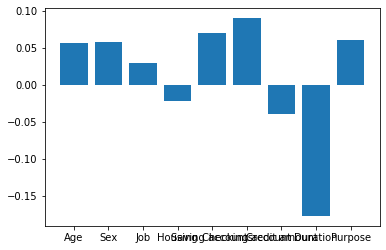

In [15]:
importance = clf.coef_
importance = pd.Series(importance[0])
column = X.columns
importance
# summarize feature importance
for i,v in enumerate(importance):
    print(f'{column[i]}: {v}')
# plot feature importance
plt.bar([x for x in column], importance)
plt.show()